# Write Good Code

## Modelo de crecimiento de Solow (Mal escrito)

$$ k_{t+1} = sk^{\alpha}_t + (1 - \gamma)k_t , \;\;\;\;\;\;\;\; t = 1,2, \dots $$

Siendo los datos:
- $k_{t}$ el capital en funcion del tiempo
- s, $\alpha$, $\gamma$ son parametros (Ahorros, Parametros de productividad, Depreciación)

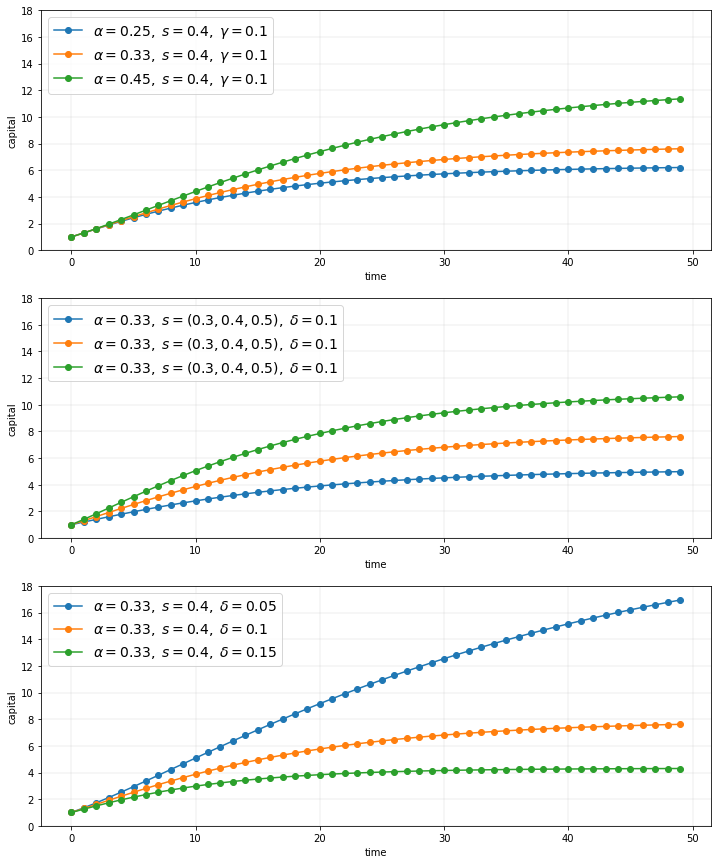

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Alojando memoria por serienen tiempos

k = np.empty(50)
fig, axes = plt.subplots(3,1, figsize=(12,15))

# Trajectorias con diferentes alpha

gamma = 0.1
s = 0.4
alpha = (0.25, 0.33, 0.45)

for i in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**alpha[i] + (1 - gamma) * k[t]
    axes[0].plot(k, 'o-', label=rf"$\alpha = {alpha[i]},\; s = {s},\; \gamma={gamma}$")

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]
    axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ}$")

axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]
    axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")

axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw=0.2)
axes[2].legend(loc='upper left', frameon=True, fontsize=14)


plt.show()

## Modelo de crecimiento de Solow (Bien escrito)

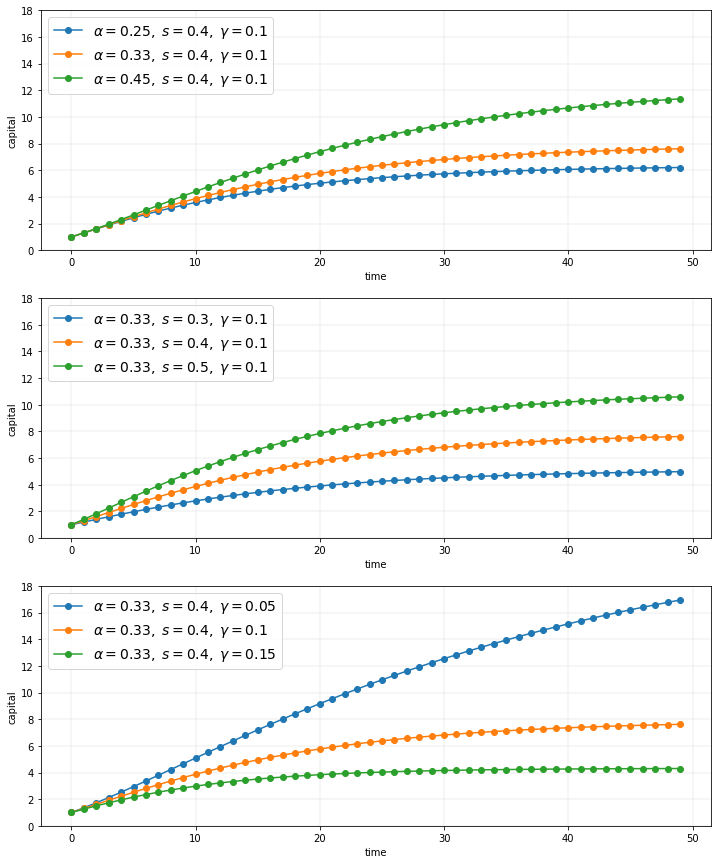

In [12]:
from itertools import product

def plot_path(ax, alpha_s, s_vals, gamma_s, series_length=50):
    
    k = np.empty(series_length)
    
    for (alpha, s, gamma) in product(alpha_s, s_vals, gamma_s):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t]**alpha + (1 - gamma) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {alpha}, \; s = {s}, \; \gamma = {gamma} $")
        
    ax.grid(lw=0.2)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12,15))

set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
        alpha_s, s_vals, gamma_s = params
        plot_path(ax, alpha_s, s_vals, gamma_s)

plt.show()
